## Aula 15: Séries temporais

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from pandas_datareader.data import DataReader
import requests

%matplotlib inline

## Trabalhando com APIs e datas

### Via requests

In [3]:
url = 'https://query1.finance.yahoo.com/v7/finance/download/AMZN?period1=1560036663&period2=1591659063&interval=1d&events=history'

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.76 Safari/537.36'} # This is chrome, you can set whatever browser you like

resposta = requests.get(url, headers=headers)

# print(resposta.text)
# print(type(resposta.text))
# print(resposta.content)
# print(type(resposta.content))

with open('../datasets/amazon.csv', 'wb') as arquivo:
    arquivo.write(resposta.content)

In [4]:
amazon = pd.read_csv('../datasets/amazon.csv')
dates = amazon.loc[::3]['Date']
volume = amazon.loc[::3]['Volume']
last = amazon.loc[::3]['Close']

amazon.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-06-10,1822.000000,1884.869995,1818.000000,1860.630005,1860.630005,5371000
1,2019-06-11,1883.250000,1893.699951,1858.000000,1863.699951,1863.699951,4042700
2,2019-06-12,1853.979980,1865.000000,1844.380005,1855.319946,1855.319946,2678300
3,2019-06-13,1866.719971,1883.089966,1862.219971,1870.300049,1870.300049,2795800
4,2019-06-14,1864.000000,1876.000000,1859.000000,1869.670044,1869.670044,2851200


In [5]:
last

0      1860.630005
3      1870.300049
6      1901.369995
9      1911.300049
12     1897.829956
          ...     
237    2426.260010
240    2446.739990
243    2410.389893
246    2471.040039
249    2460.600098
Name: Close, Length: 84, dtype: float64

In [6]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [7]:
amazon.set_index('Date', inplace=True)
amazon.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-10,1822.000000,1884.869995,1818.000000,1860.630005,1860.630005,5371000
2019-06-11,1883.250000,1893.699951,1858.000000,1863.699951,1863.699951,4042700
2019-06-12,1853.979980,1865.000000,1844.380005,1855.319946,1855.319946,2678300
2019-06-13,1866.719971,1883.089966,1862.219971,1870.300049,1870.300049,2795800
2019-06-14,1864.000000,1876.000000,1859.000000,1869.670044,1869.670044,2851200


In [8]:
type(amazon.index)

pandas.core.indexes.base.Index

In [9]:
amazon['2019-06']

KeyError: '2019-06'

In [10]:
amazon.index = pd.to_datetime(amazon.index, format="%Y-%m-%d")

In [11]:
amazon

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-10,1822.000000,1884.869995,1818.000000,1860.630005,1860.630005,5371000
2019-06-11,1883.250000,1893.699951,1858.000000,1863.699951,1863.699951,4042700
2019-06-12,1853.979980,1865.000000,1844.380005,1855.319946,1855.319946,2678300
2019-06-13,1866.719971,1883.089966,1862.219971,1870.300049,1870.300049,2795800
2019-06-14,1864.000000,1876.000000,1859.000000,1869.670044,1869.670044,2851200
...,...,...,...,...,...,...
2020-06-02,2467.000000,2473.530029,2445.310059,2472.409912,2472.409912,2529900
2020-06-03,2468.010010,2488.000000,2461.169922,2478.399902,2478.399902,2671000
2020-06-04,2477.429932,2507.540039,2450.010010,2460.600098,2460.600098,2948700


In [13]:
amazon.loc['2019-06']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-10,1822.000000,1884.869995,1818.000000,1860.630005,1860.630005,5371000
2019-06-11,1883.250000,1893.699951,1858.000000,1863.699951,1863.699951,4042700
2019-06-12,1853.979980,1865.000000,1844.380005,1855.319946,1855.319946,2678300
2019-06-13,1866.719971,1883.089966,1862.219971,1870.300049,1870.300049,2795800
2019-06-14,1864.000000,1876.000000,1859.000000,1869.670044,1869.670044,2851200
2019-06-17,1876.500000,1895.689941,1875.449951,1886.030029,1886.030029,2634300
2019-06-18,1901.349976,1921.670044,1899.790039,1901.369995,1901.369995,3895700
2019-06-19,1907.839966,1919.579956,1892.469971,1908.790039,1908.790039,2895300
2019-06-20,1933.329956,1935.199951,1905.800049,1918.189941,1918.189941,3217200


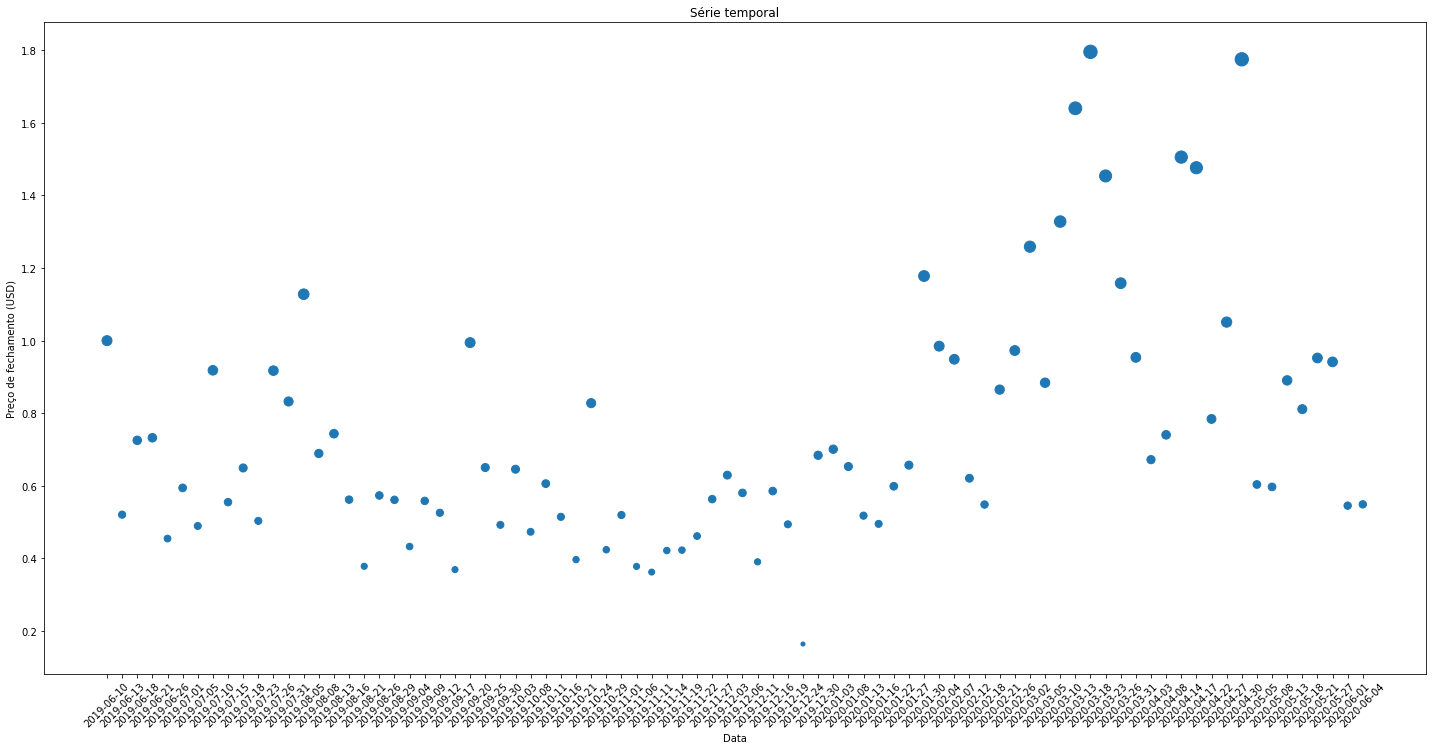

In [14]:
volume = volume/volume[0]

plt.figure(figsize=(20, 10))
plt.scatter(dates, volume, s=100*volume)

plt.title('Série temporal')
plt.xlabel('Data')
plt.ylabel('Preço de fechamento (USD)')

plt.tight_layout()
plt.tick_params(axis='x', rotation=45)


### Via Pandas DataReader

https://finance.yahoo.com/

In [15]:
df_petr4 = DataReader('PETR4.SA', data_source='yahoo',
                      start='2009-1-1')

In [17]:
df_petr4.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-10-27,29.059999,28.469999,28.830000,28.690001,57579200.0,28.690001
2021-10-28,29.250000,28.250000,28.530001,28.959999,89578000.0,28.959999
2021-10-29,29.190001,26.969999,29.129999,27.150000,157340000.0,27.150000
2021-11-01,28.320000,27.370001,27.709999,28.000000,102157200.0,28.000000
2021-11-03,27.850000,26.799999,27.709999,26.850000,82355600.0,26.850000


In [18]:
df_ciel3 = DataReader('CIEL3.SA', data_source='yahoo',
                      start='2009-1-1')['Adj Close']

In [19]:
df_ciel3

Date
2009-06-29    5.559886
2009-06-30    5.586406
2009-07-01    5.911314
2009-07-02    5.974306
2009-07-03    5.914628
                ...   
2021-10-27    2.360000
2021-10-28    2.250000
2021-10-29    2.190000
2021-11-01    2.240000
2021-11-03    2.320000
Name: Adj Close, Length: 3060, dtype: float64

<AxesSubplot:xlabel='Date'>

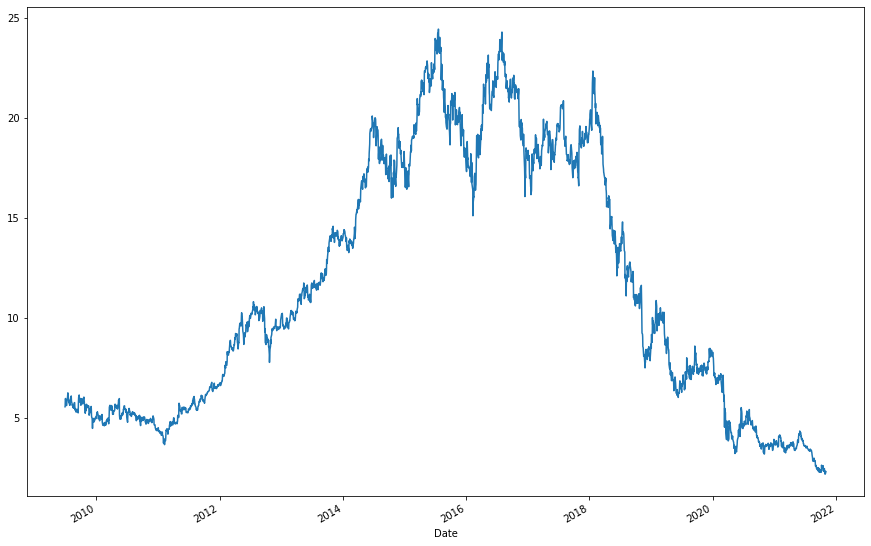

In [20]:
plt.figure(figsize=(15, 10))
df_ciel3.plot()

## Janelas deslizantes

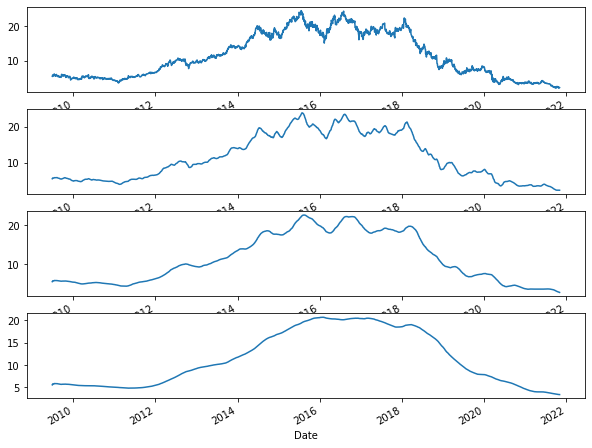

In [21]:
df_ciel3.plot(figsize=(10, 8))
plt.subplot(4, 1, 1)
df_ciel3.plot()
plt.subplot(4, 1, 2)
df_ciel3.rolling(window='30D').mean().plot();
plt.subplot(4, 1, 3)
df_ciel3.rolling(window='120D').mean().plot();

plt.subplot(4, 1, 4)
df_ciel3.rolling(window='360D').mean().plot();

In [36]:
(5.586406+5.559886)/2

5.5731459999999995

In [23]:
df_ciel3

Date
2009-06-29    5.559886
2009-06-30    5.586406
2009-07-01    5.911314
2009-07-02    5.974306
2009-07-03    5.914628
                ...   
2021-10-27    2.360000
2021-10-28    2.250000
2021-10-29    2.190000
2021-11-01    2.240000
2021-11-03    2.320000
Name: Adj Close, Length: 3060, dtype: float64

In [47]:
df_ciel3.rolling(window='3D').mean()

Date
2009-06-29    5.559886
2009-06-30    5.573146
2009-07-01    5.685869
2009-07-02    5.824009
2009-07-03    5.933416
                ...   
2021-10-27    2.376667
2021-10-28    2.303333
2021-10-29    2.266667
2021-11-01    2.240000
2021-11-03    2.280000
Name: Adj Close, Length: 3060, dtype: float64

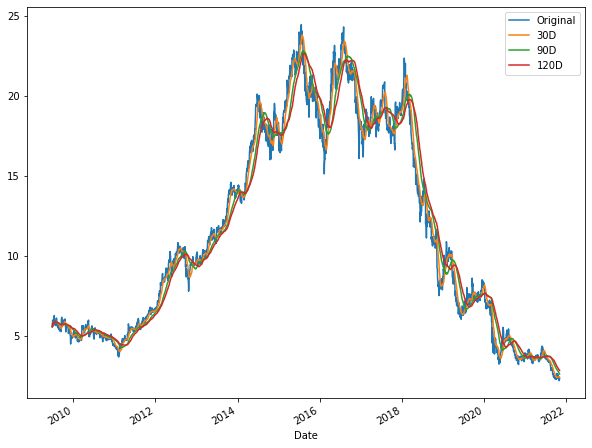

In [22]:
# 30D = calendar days
df_ciel3.plot(figsize=(10, 8), label='Original')
df_ciel3.rolling(window='30D').mean().plot(label='30D')
df_ciel3.rolling(window='90D').mean().plot(label='90D')
df_ciel3.rolling(window='120D').mean().plot(label='120D')
plt.legend()
plt.show()

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

<Figure size 1440x720 with 0 Axes>

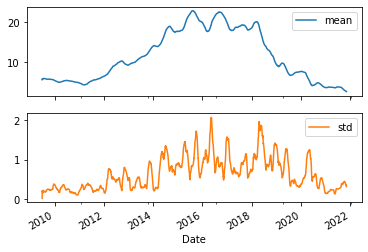

In [48]:
plt.figure(figsize=(20, 10))
df_ciel3.rolling(window='90D').agg(['mean', 'std']).plot(subplots=True)
# plt.show()

In [49]:
df_ciel3.head(12)

Date
2009-06-29    5.559886
2009-06-30    5.586406
2009-07-01    5.911314
2009-07-02    5.974306
2009-07-03    5.914628
2009-07-06    5.851636
2009-07-07    5.619560
2009-07-08    5.636136
2009-07-09    5.636136
2009-07-10    5.798592
2009-07-13    5.964359
2009-07-14    6.033982
Name: Adj Close, dtype: float64

In [50]:
df_ciel3.rolling(window='10D').mean().head(11)

Date
2009-06-29    5.559886
2009-06-30    5.573146
2009-07-01    5.685869
2009-07-02    5.757978
2009-07-03    5.789308
2009-07-06    5.799696
2009-07-07    5.773962
2009-07-08    5.756734
2009-07-09    5.766265
2009-07-10    5.792789
2009-07-13    5.751070
Name: Adj Close, dtype: float64

In [51]:
df_ciel3.rolling(window=10).mean().head(11)

Date
2009-06-29         NaN
2009-06-30         NaN
2009-07-01         NaN
2009-07-02         NaN
2009-07-03         NaN
2009-07-06         NaN
2009-07-07         NaN
2009-07-08         NaN
2009-07-09         NaN
2009-07-10    5.748860
2009-07-13    5.789307
Name: Adj Close, dtype: float64

In [52]:
df_ciel3_r = df_ciel3.rolling(window='90D')

<AxesSubplot:xlabel='Date'>

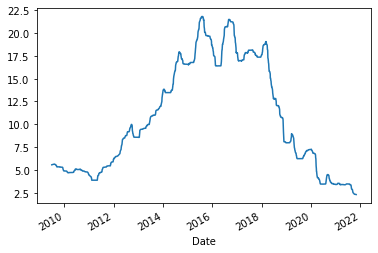

In [53]:
df_ciel3_r.quantile(0.1).plot()

In [ ]:
df_ciel3_r

<AxesSubplot:xlabel='Date'>

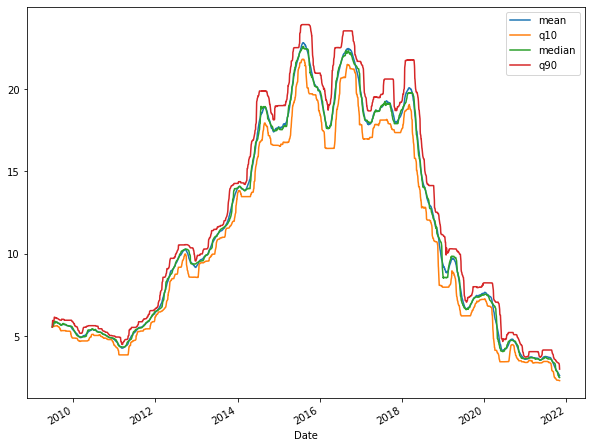

In [54]:
pd.concat([df_ciel3_r.mean().to_frame('mean'),
    df_ciel3_r.quantile(0.1).to_frame('q10'),
           df_ciel3_r.median().to_frame('median'),
           df_ciel3_r.quantile(0.9).to_frame('q90')], axis=1).plot(figsize=(10, 8))

**Taxa de retorno**

- retorno de um período único

$$ r_t = \frac{P_t}{P_{t-1}} -1 $$

- retorno de vários períodos
$$ R_T = (1 + r_1)(1 + r_2)...(1 + r_T) - 1 $$

In [59]:
pd.date_range(start='2020',periods=4, freq='Q')

DatetimeIndex(['2020-03-31', '2020-06-30', '2020-09-30', '2020-12-31'], dtype='datetime64[ns]', freq='Q-DEC')

In [60]:
df_value = pd.DataFrame(np.arange(20, 100, 20),
                        index=pd.date_range(start='2020',
                                            periods=4, freq='Q'),
                        columns=['values'])

# df_value['pct change'] = df_value['values'].pct_change()
# df_value['cumulative sum'] = df_value['values'].cumsum()
# df_value['cumulative product'] = df_value['values'].cumprod()
df_value

,values
2020-03-31,20
2020-06-30,40
2020-09-30,60
2020-12-31,80


In [61]:
df_value['pct change'] = df_value['values'].pct_change()
df_value['cumulative sum'] = df_value['values'].cumsum()
df_value['cumulative product'] = df_value['values'].cumprod()
df_value

,values,pct change,cumulative sum,cumulative product
2020-03-31,20,NaN,20,20
2020-06-30,40,1.000000,60,800
2020-09-30,60,0.500000,120,48000
2020-12-31,80,0.333333,200,3840000


In [74]:
(((df_value['values'].pct_change() + 1).cumprod() - 1)*100)

2020-03-31      NaN
2020-06-30    100.0
2020-09-30    200.0
2020-12-31    300.0
Freq: Q-DEC, Name: values, dtype: float64

In [70]:
(df_value['values']/df_value.iloc[0]['values'] - 1)*100

2020-03-31      0.0
2020-06-30    100.0
2020-09-30    200.0
2020-12-31    300.0
Freq: Q-DEC, Name: values, dtype: float64

In [71]:
(((df_ciel3.pct_change() + 1).cumprod() - 1)*100)

Date
2009-06-29          NaN
2009-06-30     0.476993
2009-07-01     6.320786
2009-07-02     7.453752
2009-07-03     6.380384
                ...    
2021-10-27   -57.553088
2021-10-28   -59.531544
2021-10-29   -60.610702
2021-11-01   -59.711404
2021-11-03   -58.272527
Name: Adj Close, Length: 3060, dtype: float64

<AxesSubplot:xlabel='Date'>

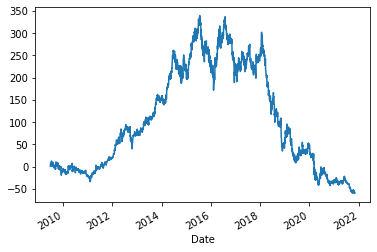

In [72]:
# taxa de retorno
(((df_ciel3.pct_change() + 1).cumprod() - 1)*100).plot()

$$ R_T = (1 + r_1)(1 + r_2)...(1 + r_T) - 1 $$

### Como calcular o retorno de vários períodos?

soma = log(a) + log(b) + ... + lon(n) = log(a*b*...*n)

e^log(soma) - 1

e^log(soma) = soma

log(x) = log(soma) => soma = x

In [ ]:
def compound1(r):
    return np.expm1(np.log1p(r).sum())

def compound2(r):
    return (r+1).prod()-1

In [103]:
compound1(df_ciel3.pct_change().dropna())

-0.5827251603634072

In [102]:
compound2(df_ciel3.pct_change().dropna())

-0.5827251603634065

In [106]:
%timeit compound1(df_ciel3.pct_change().dropna())

475 µs ± 15.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [107]:
%timeit compound2(df_ciel3.pct_change().dropna())

453 µs ± 5.58 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


<AxesSubplot:xlabel='Date'>

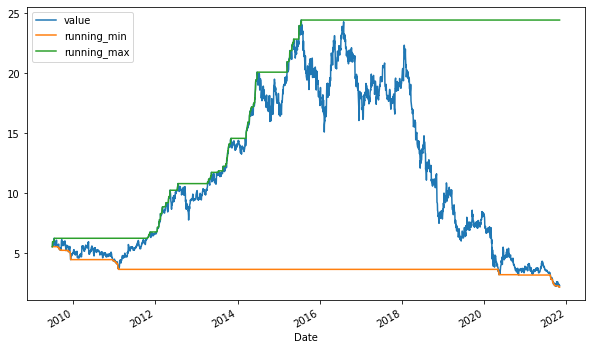

In [108]:
# valor máximo e mínimo
df_ciel_run = df_ciel3.to_frame('value').copy()
df_ciel_run['running_min'] = df_ciel_run['value'].expanding().min()
df_ciel_run['running_max'] = df_ciel_run['value'].expanding().max()
df_ciel_run.plot(figsize=(10, 6))

## 2. Decomposição de séries temporais

## Tendência, sazonalidade e ruído

Uma série temporal pode ser decomposta nos seguintes componentes:

- **Tendência (T)**: indica o seu comportamento ao longo do tempo, ou seja, se é crescente, decrescente ou estável. Além disso indica a velocidade destas mudanças. 

<br>

- **Ciclos (C)**: são  oscilações de subida e de queda nas séries, de forma suave e repetida, ao longo da componente de tendência. Os movimentos cíclicos tendem a ser irregulares.

<br>

- **Sazonalidade (S)**: são oscilações de subida e de queda que sempre ocorrem em um determinado período do ano, do mês, da semana ou do dia. Os movimentos facilmente previsíveis, ocorrendo em intervalos regulares de tempo. A partir da sazonalidade pode-se classificar uma série temporal em aditiva ou multiplicativa. Uma **série é aditiva** se a magnitude da **sazonalidade mantem-se constante** ao longo do prazo. A série é denominada **multiplicativa** se ao longo do tempo a **amplitude da sazonalidade aumenta**.

<br>

- **Ruído Aleatório ($\epsilon$)**: ou erro no período **t** são variações irregulares ou flutuações inexplicáveis, resultado de fatos fortuitos e inesperados.
<br>

**Exemplo 1**: Esta série é referente à quantidade de passageiros na Airline. Note que a tendência também é crescente e sazonal. Com o decorrer do tempo a quantidade de passageiros que viajam pela companhia aérea aumenta (eixo y), porém a periodicidade da sazonalidade continua marcada no gráfico. Trata-se de uma série com sazonalidade multiplicativa. Neste caso, a quantidade de passageiros a cada período sazonal aumenta.

![](https://s3-sa-east-1.amazonaws.com/lcpi/9a0420ad-f498-4d2e-9a2b-28a224ccbdf5.png)

**Exemplo 2**: No exemplo abaixo é representado a média da temperatuda diária em uma determinada cidade ao longo de 1 ano. Note que a série é estável (não possui tendência crescente tampouco decrescente), é sazonal aditiva (possui periodicidade bem marcada e sem grande variação na amplitude).

![](https://s3-sa-east-1.amazonaws.com/lcpi/ec935a3f-daf0-4fff-a99f-5bc3c2a906d3.png)

Em outras palavras, uma série temporal $Z(t)$ pode ser reconstruída atrvés de uma função que depende das componentes acima $f(T_t,C_t,S_t,\epsilon_t)$. Uma série aditiva é representada por $Z(t)=T_t+C_t+S_t+\epsilon_t$, equanto a multiplicativa é dada por $Z(t)=T_t \times C_t \times  S_t \times \epsilon_t$

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [110]:
df_flights = sns.load_dataset('flights')
df_flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [111]:
df_flights.shape

(144, 3)

In [112]:
df_flights.index = pd.date_range('1949-01',
                                 periods=len(df_flights),
                                 freq='M')

In [113]:
df_flights

,year,month,passengers
1949-01-31,1949,Jan,112
1949-02-28,1949,Feb,118
1949-03-31,1949,Mar,132
1949-04-30,1949,Apr,129
1949-05-31,1949,May,121
...,...,...,...
1960-08-31,1960,Aug,606
1960-09-30,1960,Sep,508
1960-10-31,1960,Oct,461
1960-11-30,1960,Nov,390


In [114]:
df_flights.drop(['year', 'month'], axis=1, inplace=True)

In [115]:
df_flights

,passengers
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121
...,...
1960-08-31,606
1960-09-30,508
1960-10-31,461
1960-11-30,390


<AxesSubplot:>

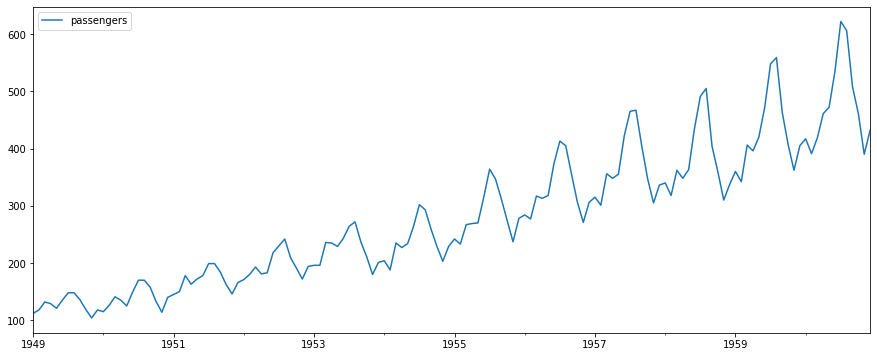

In [116]:
df_flights.plot(figsize=(15,6))

<Figure size 720x432 with 0 Axes>

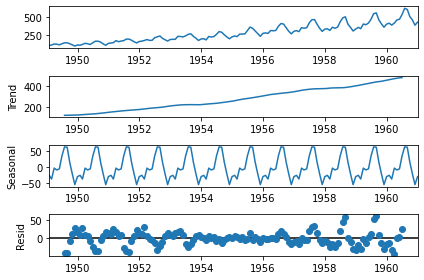

In [122]:
decomp = seasonal_decompose(df_flights, model='additive')
plt.figure(figsize=(10, 6))
decomp.plot()
plt.show()

In [125]:
decomp = seasonal_decompose(df_flights, model='multiplicative')

<Figure size 720x432 with 0 Axes>

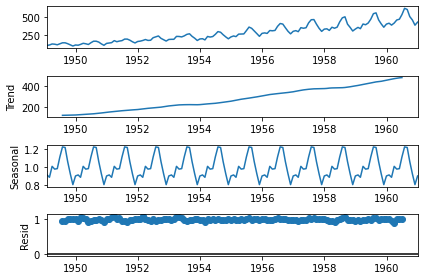

In [126]:
plt.figure(figsize=(10, 6))
decomp.plot()
plt.show()

In [127]:
dir(decomp)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_observed',
 '_resid',
 '_seasonal',
 '_trend',
 '_weights',
 'nobs',
 'observed',
 'plot',
 'resid',
 'seasonal',
 'trend',
 'weights']

<AxesSubplot:>

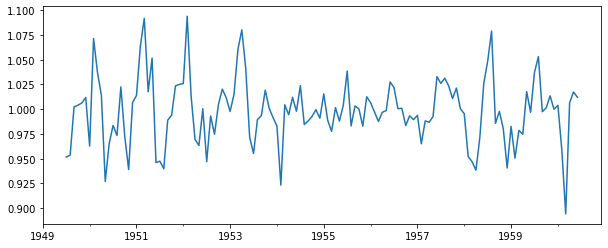

In [128]:
decomp.resid.plot(figsize=(10, 4))

<AxesSubplot:>

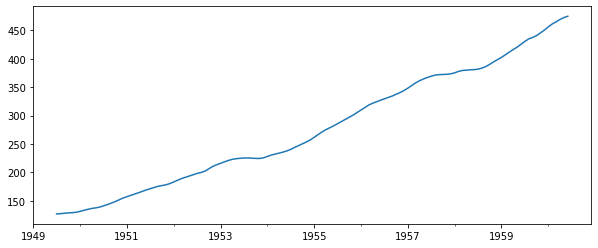

In [129]:
decomp.trend.plot(figsize=(10,4))

<AxesSubplot:>

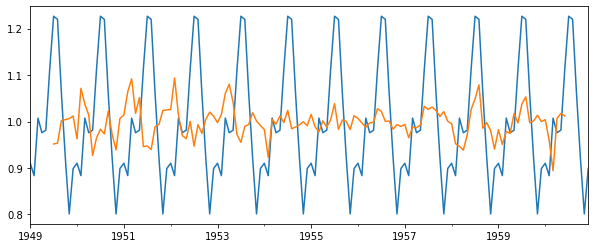

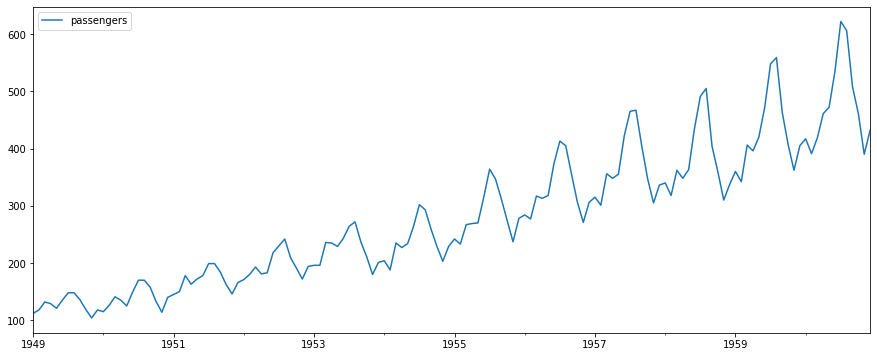

In [130]:
decomp.seasonal.plot(figsize=(10,5))
decomp.resid.plot(figsize=(10, 4))
df_flights.plot(figsize=(15,6))

In [4]:
import yfinance as yf
import matplotlib.pyplot as plt

data_df = yf.download("ITSA4.SA", start="2015-01-01")

[*********************100%***********************]  1 of 1 completed


O retorno mensal do papel, por sua vez, aparenta ter sazonalidade


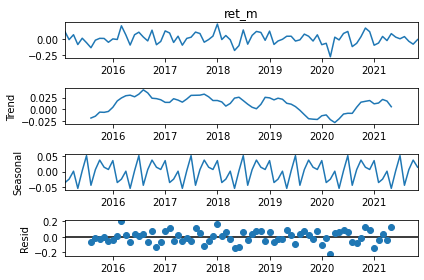

In [8]:
dadosmensais=data_df
dadosmensais['month'] = pd.to_datetime(dadosmensais.index).month
dadosmensais['year'] = pd.to_datetime(dadosmensais.index).year
dadosmensais['day']=1 
dadosmensais=dadosmensais.groupby(['year','month'],as_index=False).last()

# Criação de coluna data

dadosmensais['DATA']=pd.to_datetime(dict(year=dadosmensais.year, month=dadosmensais.month, day=dadosmensais.day))

# Mudança de index

dadosmensais.set_index('DATA', inplace=True)

# Dropa colunas CO_DIA, CO_ANO e CO_MES

dadosmensais.drop('year', inplace=True, axis=1)
dadosmensais.drop('month', inplace=True, axis=1)
dadosmensais.drop('day', inplace=True, axis=1)


# Criação de retorno mensal de fechamento de mês

dadosmensais['ret_m'] = (dadosmensais['Close']/dadosmensais['Close'].shift(1)-1 )

# Retirada de dados faltantes
data_m=dadosmensais[dadosmensais['ret_m'].notna()]

# Decomposição da série 

result_m = seasonal_decompose(data_m['ret_m'], model='additive')

result_m.plot()

print('O retorno mensal do papel, por sua vez, aparenta ter sazonalidade')

In [12]:
data_m.index

DatetimeIndex(['2015-02-01', '2015-03-01', '2015-04-01', '2015-05-01',
               '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01',
               '2015-10-01', '2015-11-01', '2015-12-01', '2016-01-01',
               '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01',
               '2016-06-01', '2016-07-01', '2016-08-01', '2016-09-01',
               '2016-10-01', '2016-11-01', '2016-12-01', '2017-01-01',
               '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01',
               '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01',
               '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01',
               '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01',
               '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01',
               '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01',
               '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01',
               '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01',
      